# Titanic Survival Predictions
---
##### The problem statement for this project is to find out what is the best prediction model and the best predictor to predict the survival rate of the passengers on the Titanic. 

##### One of the reasons that the shipwreck led to many loss of life was due to the lack of lifeboats for the passengers and crew. Although there were some element of luck involved in surviving, some groups of people were more likely to survive than others, such as women, children and the upper-class.

##### We applied tools of machine learning to predict which passengers survived the tragedy.

### Contents:
1. Import required libraries<br>
2. Importing data
3. Data Preparations
4. Data Visualization and Analysis
5. Split Training and Test data
6. Choosing the best model

### Import required libraries

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sb.set() #sets the default seaborn style for graphics

### Importing Data 

In [2]:
# Load file into dataframe
titanic_train_data = pd.read_csv('titanic_train.csv')

#print the first 5 rows
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#info of data
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check number of missing values in each column
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### As seen above, Age, Cabin and Embarked have missing values

# Data Preparations
## Handling Missing Values

---

##### To handle the missing values above, each case needs to be handled differently

1. Age - replace missing values with mean so as to reduce effect on titanic_train_data
2. Cabin - remove entire column as majority of the values are missing
3. Embarked - replace missing values with most common value to reduce effect on titanic_train_data

In [5]:
# Remove Cabin from titanic_train_data
titanic_train_data = titanic_train_data.drop(columns='Cabin',axis = 1)

In [6]:
# First mean value of Age
print(titanic_train_data['Age'].mean())

29.69911764705882


In [7]:
# Replace missing values in Age with the mean value
titanic_train_data['Age'].fillna(titanic_train_data['Age'].mean(), inplace = True)

In [8]:
# Find mode value of Embarked
print(titanic_train_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
## Replace missing values in Age with the mean value
titanic_train_data['Embarked'].fillna(titanic_train_data['Embarked'].mode()[0], inplace = True)

In [10]:
# Check that missing values were handled correctly 
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Check number of missing values in each column
titanic_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting Catergorical Values to Integers
----
Sex - male -> 0, female -> 1<br>

Embarked - Southhampton -> 0, Queenstown -> 1, Cherbourg ->2<br>

Separating the age into age groups:<br>
Age &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; | Group<br>
0-16 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 0<br> 
17-32 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 1<br> 
33-48 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 2<br> 
49-64 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 3<br>
more than 64&ensp;&ensp;| 4<br> 

In [12]:
# Converting categorical Columns
titanic_train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'Q':1,'C':2}}, inplace=True)

In [13]:
# Show AgeBand when it is split evenly according to data
titanic_train_data['AgeBand'] = pd.cut(titanic_train_data['Age'], 5)
titanic_train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [14]:
# Sorts Age to a new age ranges
titanic_train_data.loc[titanic_train_data['Age'] <= 16, 'Age'] = 0
titanic_train_data.loc[(titanic_train_data['Age'] > 16) & (titanic_train_data['Age'] <= 32), 'Age'] = 1
titanic_train_data.loc[(titanic_train_data['Age'] > 32) & (titanic_train_data['Age'] <= 48), 'Age'] = 2
titanic_train_data.loc[(titanic_train_data['Age'] > 48) & (titanic_train_data['Age'] <= 64), 'Age'] = 3
titanic_train_data.loc[ titanic_train_data['Age'] > 64, 'Age'] = 4
titanic_train_data['Age'] = titanic_train_data['Age'].astype(int)

In [15]:
# Show FareBand when it is split evenly according to data
titanic_train_data['FareBand'] = pd.qcut(titanic_train_data['Fare'], 4)
titanic_train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [16]:
# Sorts Age to a new fare range
titanic_train_data.loc[titanic_train_data['Fare'] <= 7.91, 'Fare'] = 0
titanic_train_data.loc[(titanic_train_data['Fare'] > 7.91) & (titanic_train_data['Fare'] <= 14.454), 'Fare'] = 1
titanic_train_data.loc[(titanic_train_data['Fare'] > 14.454) & (titanic_train_data['Fare'] <= 31), 'Fare'] = 2
titanic_train_data.loc[titanic_train_data['Fare'] > 31 , 'Fare'] = 3
titanic_train_data['Fare'] = titanic_train_data['Fare'].astype(int)

In [17]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,"(16.336, 32.252]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,2,"(32.252, 48.168]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,0,"(16.336, 32.252]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,0,"(32.252, 48.168]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,0,"(32.252, 48.168]","(7.91, 14.454]"


## Data Cleaning (Removing uneccessary info)
---

#### Passenger ID is not required as it holds no substance.
#### Ticket values vary too much with characters and numbers that dont represent anything and can be removed.
#### Name can also be removed due to its insignificance

In [18]:
# Remove PassengerID and Ticket from dataset
titanic_train_data =titanic_train_data.drop(columns='PassengerId',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='AgeBand',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='FareBand',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='Ticket',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='Name',axis = 1)

In [19]:
titanic_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,2
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


## Choosing the Best Model

Here is the testing of the following models with the training data set:<br>
1. Logistic Regression<br>
2. KNN or k-Nearest Neighbors<br>
3. Support vector machines<br>
4. Naive Bayes Classifier<br>
5. Decision Tree<br>
6. Random Forest<br>
7. Perceptron<br>

In [45]:
# Splitting dataset to train and test
predictors = titanic_train_data.drop(['Survived'], axis=1)
target = titanic_train_data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [46]:
# Creating a function producing Confusion Matrix using different models
def confusionMatrix(x_train,y_train,x_test,y_test,model):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    acc_model = round(accuracy_score(y_test_pred, y_test) * 100, 2)
    
    # Confusion matrix for train and test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    CM = confusion_matrix(y_train, y_train_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    print("Classification Accuracy in train data \t:",model.score(x_train, y_train))
    print("Classification Accuracy in test data \t:",model.score(x_test, y_test))
    print("True Positive Rate for train\t:", TPR)
    print("False Positive Rate for train\t:", FPR)

    CM = confusion_matrix(y_test, y_test_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print("True Positive Rate for test\t:", TPR)
    print("False Positive Rate for test\t:", FPR)

    return acc_model

Classification Accuracy in train data 	: 0.7853025936599424
Classification Accuracy in test data 	: 0.8121827411167513
True Positive Rate for train	: 0.6988847583643123
False Positive Rate for train	: 0.16
True Positive Rate for test	: 0.7945205479452054
False Positive Rate for test	: 0.1774193548387097


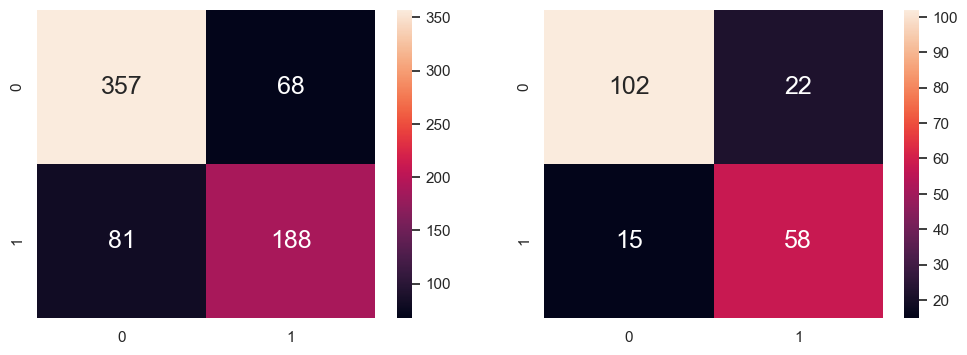

In [30]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

acc_logreg = confusionMatrix(x_train,y_train,x_test,y_test,logreg)

Classification Accuracy in train data 	: 0.7997118155619597
Classification Accuracy in test data 	: 0.7360406091370558
True Positive Rate for train	: 0.7472118959107806
False Positive Rate for train	: 0.16705882352941176
True Positive Rate for test	: 0.6986301369863014
False Positive Rate for test	: 0.24193548387096775


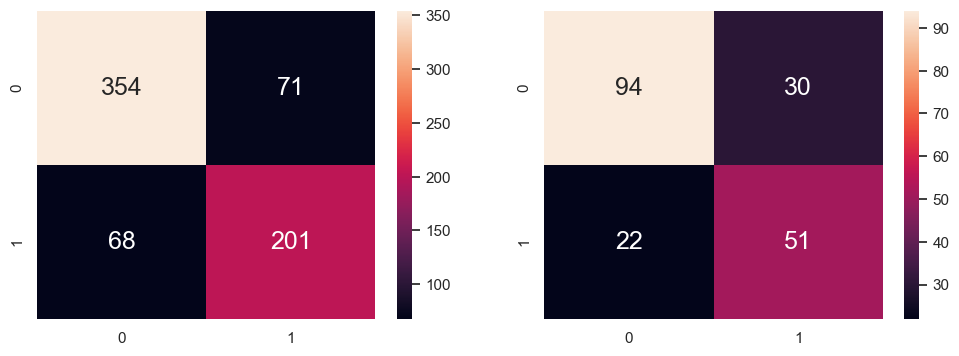

In [31]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
acc_knn = confusionMatrix(x_train,y_train,x_test,y_test,knn)

Classification Accuracy in train data 	: 0.8242074927953891
Classification Accuracy in test data 	: 0.8121827411167513
True Positive Rate for train	: 0.7026022304832714
False Positive Rate for train	: 0.0988235294117647
True Positive Rate for test	: 0.7123287671232876
False Positive Rate for test	: 0.12903225806451613


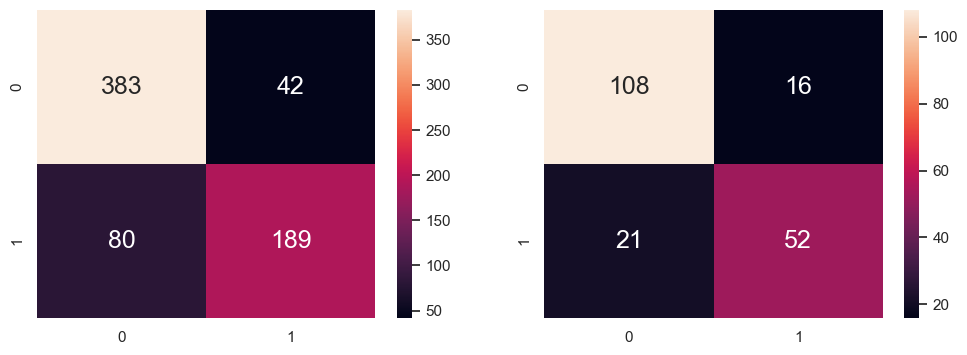

In [32]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = confusionMatrix(x_train,y_train,x_test,y_test,svc)

Classification Accuracy in train data 	: 0.7521613832853026
Classification Accuracy in test data 	: 0.7969543147208121
True Positive Rate for train	: 0.7472118959107806
False Positive Rate for train	: 0.2447058823529412
True Positive Rate for test	: 0.8493150684931506
False Positive Rate for test	: 0.23387096774193547


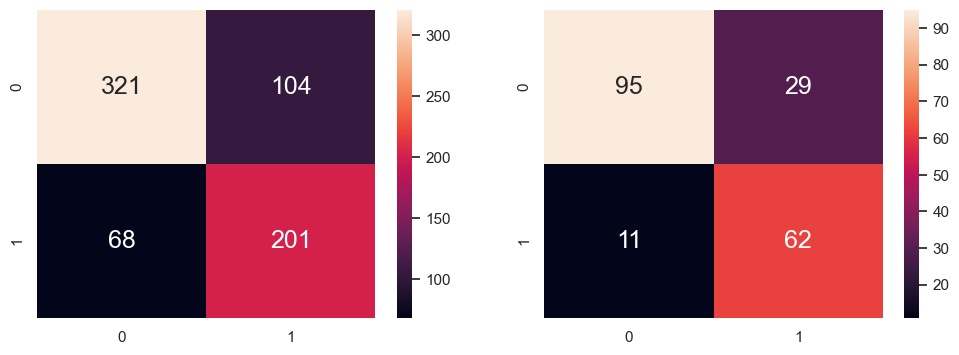

In [33]:
#Naive Bayes Classifier

nb = GaussianNB()
nb.fit(x_train, y_train)
acc_nb = confusionMatrix(x_train,y_train,x_test,y_test,nb)

Classification Accuracy in train data 	: 0.8876080691642652
Classification Accuracy in test data 	: 0.817258883248731
True Positive Rate for train	: 0.7657992565055762
False Positive Rate for train	: 0.03529411764705882
True Positive Rate for test	: 0.7123287671232876
False Positive Rate for test	: 0.12096774193548387


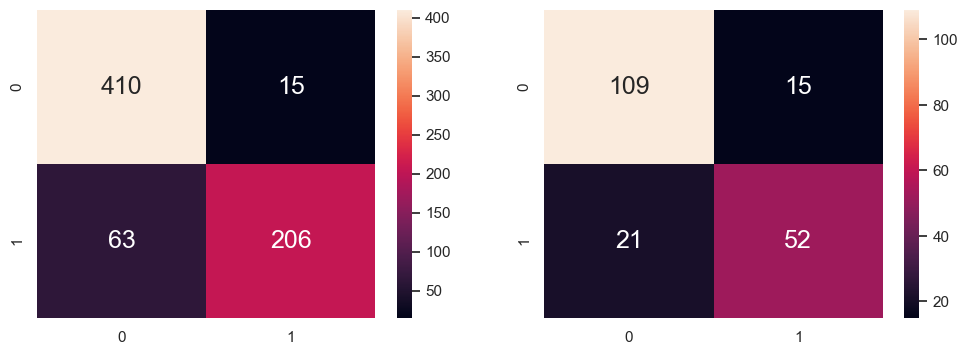

In [34]:
# Decision Tree

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
acc_decisiontree = confusionMatrix(x_train,y_train,x_test,y_test,decisiontree)

Classification Accuracy in train data 	: 0.8876080691642652
Classification Accuracy in test data 	: 0.8375634517766497
True Positive Rate for train	: 0.79182156133829
False Positive Rate for train	: 0.05176470588235294
True Positive Rate for test	: 0.7534246575342466
False Positive Rate for test	: 0.11290322580645161


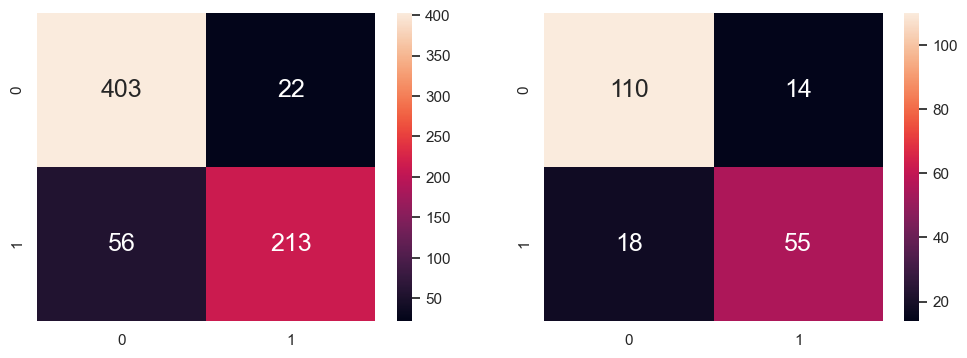

In [35]:
# Random Forest

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
acc_randomforest = confusionMatrix(x_train,y_train,x_test,y_test,randomforest)

Classification Accuracy in train data 	: 0.7564841498559077
Classification Accuracy in test data 	: 0.7918781725888325
True Positive Rate for train	: 0.5315985130111525
False Positive Rate for train	: 0.1011764705882353
True Positive Rate for test	: 0.6438356164383562
False Positive Rate for test	: 0.12096774193548387


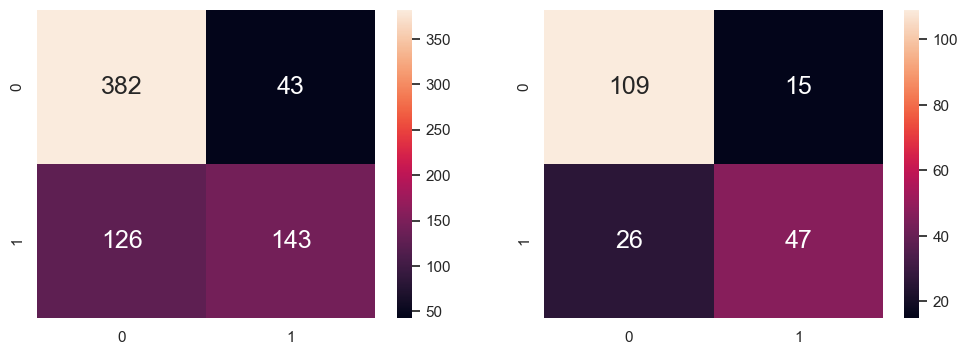

In [36]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
acc_perceptron = confusionMatrix(x_train,y_train,x_test,y_test,perceptron)

In [48]:
# Creates a table for tabulated scores
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_nb, acc_perceptron, 
              acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.76
6,Decision Tree,81.73
0,Support Vector Machines,81.22
2,Logistic Regression,81.22
4,Naive Bayes,79.70
5,Perceptron,79.19
1,KNN,73.60


As seen from the Confusion Matrices and Prediction Models above, it is evident that the Random Forest Classifier is the best prediction model to use in order to predict survival of the passengers, with a Classification Accuracy of 83.76 in the training test data.<br><br>With this ideal prediction model found, we will now move on to finding the specific individual predictor that best predicts the survival of passengers.